# Entraînement du modèle

Importer les modules nécessaires :

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import itertools
import random
import warnings
import numpy as np
import cv2
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt

Indiquer les dossiers d'import :

In [2]:
train_path = 'data/train'
test_path = 'data/test'

Créer les batches d'entraînement et de test et obtenir les images et labels de train :

In [3]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(64,64), class_mode='categorical', batch_size=26,shuffle=True)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(64,64), class_mode='categorical', batch_size=26, shuffle=True)

imgs, labels = next(train_batches)

Found 4368 images belonging to 26 classes.
Found 1090 images belonging to 26 classes.


Afficher quelques images d'exemple :

In [4]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 26, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

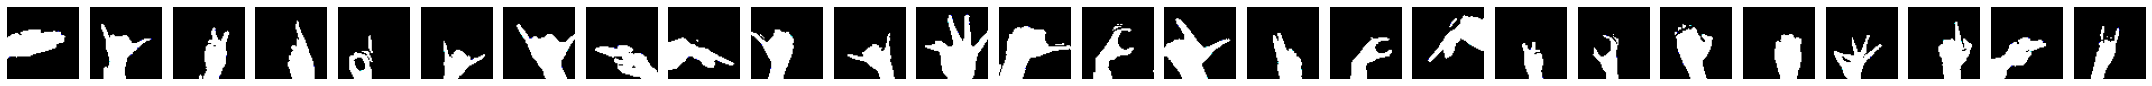

(26, 64, 64, 3)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 

In [5]:
plotImages(imgs)
print(imgs.shape)
print(labels)

Créer le modèle :

In [6]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.2))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.3))
model.add(Dense(26,activation ="softmax"))

Compiler le modèle :

In [7]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')



model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

Entraîner le modèle :

In [8]:
history2 = model.fit(train_batches, epochs=10, callbacks=[reduce_lr, early_stop],  validation_data = test_batches)#, checkpoint])
imgs, labels = next(train_batches) # Le prochain batch d'images train

imgs, labels = next(test_batches) # Le prochain batch d'images test
scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

Epoch 1/10
168/168 [==============================] - 137s 815ms/step - loss: 3.6864 - accuracy: 0.0849 - val_loss: 2.9770 - val_accuracy: 0.1651
Epoch 2/10
168/168 [==============================] - 75s 447ms/step - loss: 2.6767 - accuracy: 0.2253 - val_loss: 2.3682 - val_accuracy: 0.3028
Epoch 3/10
168/168 [==============================] - 86s 509ms/step - loss: 2.0883 - accuracy: 0.3700 - val_loss: 1.9720 - val_accuracy: 0.4028
Epoch 4/10
168/168 [==============================] - 75s 446ms/step - loss: 1.6569 - accuracy: 0.4883 - val_loss: 1.5202 - val_accuracy: 0.5275
Epoch 5/10
168/168 [==============================] - 45s 268ms/step - loss: 1.2933 - accuracy: 0.5946 - val_loss: 1.3378 - val_accuracy: 0.5661
Epoch 6/10
168/168 [==============================] - 34s 205ms/step - loss: 1.0313 - accuracy: 0.6722 - val_loss: 1.1501 - val_accuracy: 0.6349
Epoch 7/10
168/168 [==============================] - 32s 189ms/step - loss: 0.8706 - accuracy: 0.7168 - val_loss: 1.1083 - val_a

Sauvegarder le modèle :

In [9]:
model.save('best_model_dataflair3.h5')

Imprimer son historique  de pertes et de précision :

In [10]:
print(history2.history)

{'loss': [3.686396598815918, 2.6766598224639893, 2.088345527648926, 1.6568994522094727, 1.2932637929916382, 1.0312621593475342, 0.870570957660675, 0.7082855105400085, 0.5923941135406494, 0.4879484176635742], 'accuracy': [0.08493589609861374, 0.2252747267484665, 0.3699633777141571, 0.4883241653442383, 0.5945512652397156, 0.6721611618995667, 0.716804027557373, 0.7701465487480164, 0.807692289352417, 0.8424908518791199], 'val_loss': [2.977036952972412, 2.368208885192871, 1.97202467918396, 1.5202157497406006, 1.3378148078918457, 1.1500788927078247, 1.1083476543426514, 1.067259430885315, 0.8975445032119751, 0.8323479294776917], 'val_accuracy': [0.1651376187801361, 0.302752286195755, 0.4027522802352905, 0.5275229215621948, 0.5660550594329834, 0.6348623633384705, 0.6477064490318298, 0.6669724583625793, 0.7357798218727112, 0.7541284561157227], 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]}


Obtenir les images et labels de test :

In [11]:
imgs, labels = next(test_batches)

Charger le modèle :

In [12]:
model = keras.models.load_model(r"best_model_dataflair3.h5")

Evaluer le modèle :

In [13]:
scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

loss of 0.60512775182724; accuracy of 80.7692289352417%


Afficher le ``summary()`` du modèle avec ses détails :

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 31, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0

Afficher les scores de pertes et de précision sur les données de test :

In [15]:
model.metrics_names

['loss', 'accuracy']

In [35]:
scores

[0.60512775182724, 0.807692289352417]

Créer un dictionnaire des valeurs (ici les lettres) sur les index obtenus à partir de ``argmax`` pour les plus grandes probabilités :

In [16]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

Prédire sur quelques images d'exemple :

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

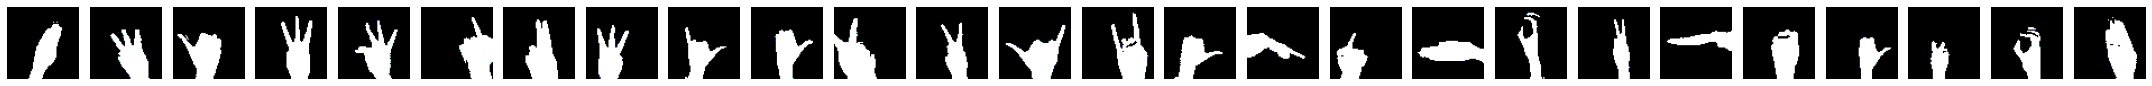

predictions on a small set of test data--

B   W   A   W   T   U   U   W   Y   A   G   V   Y   H   A   Q   G   M   O   U   N   S   A   S   O   B   
Actual labels
B   W   A   W   T   G   U   W   Y   A   V   V   Y   H   A   Q   G   M   O   K   P   S   A   X   O   B   

In [22]:
predictions = model.predict(imgs, verbose=0)
plotImages(imgs)
print("predictions on a small set of test data--")
print("")
for ind, i in enumerate(predictions):
    print(word_dict[np.argmax(i)], end='   ')
print('\nActual labels')
for i in labels:
    print(word_dict[np.argmax(i)], end='   ')

La taille de l'array ``imgs`` :

In [19]:
print(imgs.shape)

(26, 64, 64, 3)


L'historique sur les données de test :

In [44]:
history2.history

{'loss': [3.686396598815918,
  2.6766598224639893,
  2.088345527648926,
  1.6568994522094727,
  1.2932637929916382,
  1.0312621593475342,
  0.870570957660675,
  0.7082855105400085,
  0.5923941135406494,
  0.4879484176635742],
 'accuracy': [0.08493589609861374,
  0.2252747267484665,
  0.3699633777141571,
  0.4883241653442383,
  0.5945512652397156,
  0.6721611618995667,
  0.716804027557373,
  0.7701465487480164,
  0.807692289352417,
  0.8424908518791199],
 'val_loss': [2.977036952972412,
  2.368208885192871,
  1.97202467918396,
  1.5202157497406006,
  1.3378148078918457,
  1.1500788927078247,
  1.1083476543426514,
  1.067259430885315,
  0.8975445032119751,
  0.8323479294776917],
 'val_accuracy': [0.1651376187801361,
  0.302752286195755,
  0.4027522802352905,
  0.5275229215621948,
  0.5660550594329834,
  0.6348623633384705,
  0.6477064490318298,
  0.6669724583625793,
  0.7357798218727112,
  0.7541284561157227],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]}

In [38]:
import matplotlib.pyplot as plt

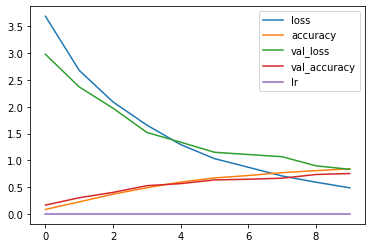

In [43]:
for key in history2.history:
    plt.plot(history2.history[key], label=key)
plt.legend()